In [2]:
import pandas
import sklearn
import pandas
import numpy
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
data = pandas.read_csv('PostBasketballStats.csv')

# drops rows with any missing values
data.dropna(inplace=True)

# sets the columns used as predictors
predictors = ['MIN%', 'PRPG!', 'D-PRPG', 'BPM', 'OBPM', 'DBPM', 'ORTG', 'USG', 'EFG', 'TS', 'OR', 'DR', 'AST', 'TO', 'A/TO', 'BLK', 'STL', 'FTR', 'FC/40', 'CLOSE 2 %', 'FAR 2 %', 'FT %', '2P %', '3PR', '3P/100', '3P %', 'AST.1', 'REB', 'PTS', 'Dunk_Percentage']

# sets the ranking as the column to be predicted
target = 'RK'

# split the data into training data and testing data
train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size = 0.2, random_state=0)

In [3]:
# Normalize Data
scaler = StandardScaler()
scaler.fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

In [4]:
data

,Unnamed: 0,RK,Role,Height,PLAYER,TEAM,CONF,ROLE,MIN%,PRPG!,...,Close2_made,Close2_attempted,Far2_made,Far2_attempted,FT_made,FT_attempted,2P_made,2P_attempted,3P_made,3P_attempted
0,0,1,Sr,83,Luka Garza,Iowa,B10,PF/C,78.8,7.0,...,176,256,60,152,141,199,237,408,44,100
1,1,2,So,73,Max Abmas,Oral Roberts,Sum,Scoring PG,95.8,6.6,...,65,113,54,118,135,151,119,231,97,224
2,2,3,Jr,71,Kendric Davis,SMU,Amer,Pure PG,86.8,6.5,...,56,84,33,86,70,84,89,170,25,67
3,3,4,Fr,76,Cameron Thomas,LSU,SEC,Wing G,84.6,6.0,...,52,81,83,210,194,220,135,291,68,209
4,4,5,So,82,Drew Timme,Gonzaga,WCC,PF/C,70.1,5.9,...,192,247,39,93,128,184,231,340,6,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1984,1984,1985,Jr,80,Anthony Crump,Northern Illinois,MAC,Wing F,50.1,-1.8,...,18,47,8,27,8,23,26,74,5,16
1985,1985,1986,Fr,82,Kenan Sarvan,Coppin St.,MEAC,Stretch 4,51.3,-1.8,...,7,10,1,9,7,11,8,19,29,107
1986,1986,1987,So,73,Tre Wood,LIU Brooklyn,NEC,Combo G,48.1,-1.9,...,23,53,6,29,9,19,29,82,1,21
1987,1987,1988,Sr,78,Alexander Perry,Mississippi Valley S,SWAC,Wing G,50.5,-2.0,...,8,25,2,26,20,38,11,1,14,53


<AxesSubplot:title={'center':'Average Player Rank by Conference'}, xlabel='CONF'>

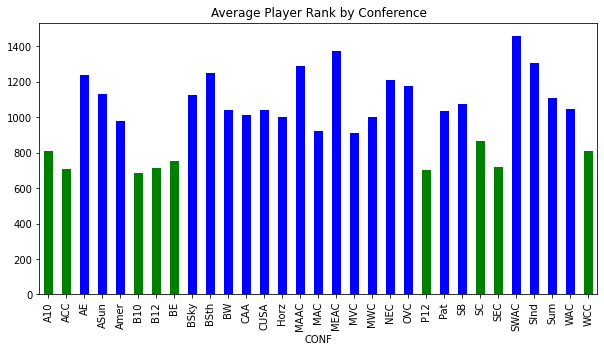

In [4]:
#Which Conference has the highest ranked players
avgrank = data.groupby("CONF").RK.mean()
avgrank.plot(kind="bar",title="Average Player Rank by Conference",figsize=(10,5),color=["green","green","blue","blue","blue","green","green","green","blue","blue","blue","blue","blue","blue","blue","blue","blue","blue","blue","blue","blue","green","blue","blue","green","green","blue","blue","blue","blue"])

<AxesSubplot:title={'center':'Free Throw Attempts by Conference'}, xlabel='CONF'>

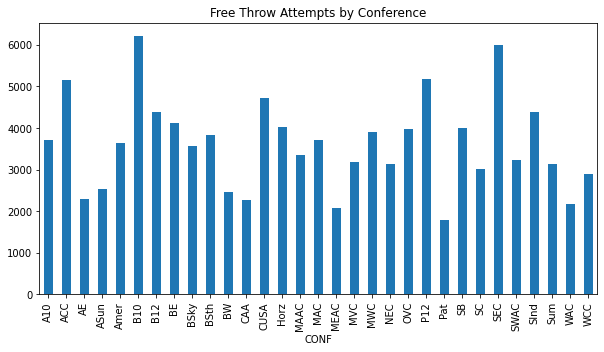

In [5]:
#Which conference shoots the most Free Throws
Ftry = data.groupby("CONF").FT_attempted.sum()
Ftry.plot(kind="bar",title="Free Throw Attempts by Conference",figsize=(10,5))

<AxesSubplot:title={'center':'Free Throws Made by Conference'}, xlabel='CONF'>

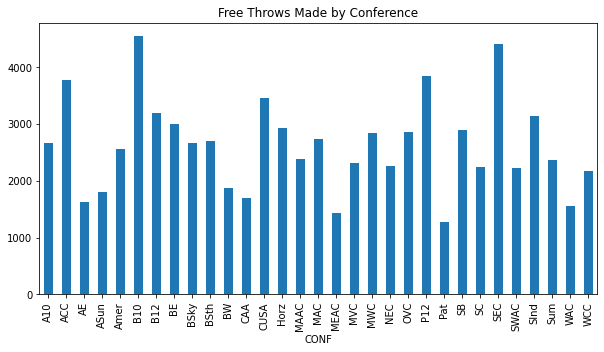

In [6]:
#which conference makes the most free throws
Fmake = data.groupby("CONF").FT_made.sum()
Fmake.plot(kind="bar",title="Free Throws Made by Conference",figsize=(10,5))

<AxesSubplot:title={'center':'Conference with the highest accuracy for Free Throws'}, xlabel='CONF'>

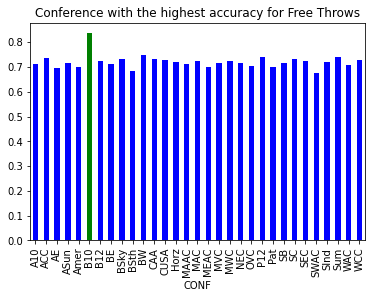

In [7]:
#Which conference has the highest free throw percentage
#ft = data.FT_made/data.FT_attempted
data['ftpercentage']=data.FT_made / data.FT_attempted 
ftrank = data.groupby("CONF").ftpercentage.mean()
ftrank.plot(kind="bar",title="Conference with the highest accuracy for Free Throws",color=["blue","blue","blue","blue","blue","green","blue","blue","blue","blue","blue","blue","blue","blue","blue","blue","blue","blue","blue","blue","blue","blue","blue","blue","blue","blue"])

<AxesSubplot:title={'center':'Average Player Rank by Role'}, xlabel='ROLE'>

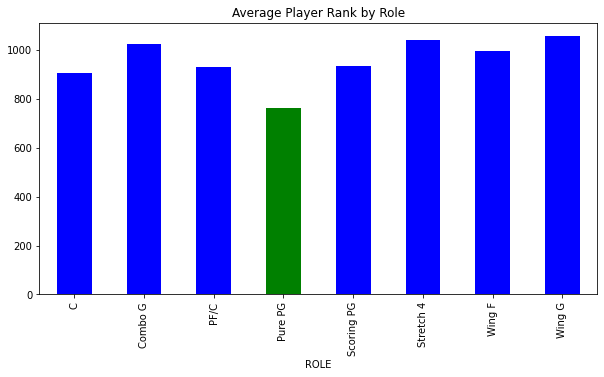

In [8]:
#which position has the highest ranked players
avgrank = data.groupby("ROLE").RK.mean()
avgrank.plot(kind="bar",title="Average Player Rank by Role",figsize=(10,5),color=["blue","blue","blue","green","blue","blue","blue","blue"])

<AxesSubplot:title={'center':'Conference with the most Freshman Players'}, xlabel='CONF'>

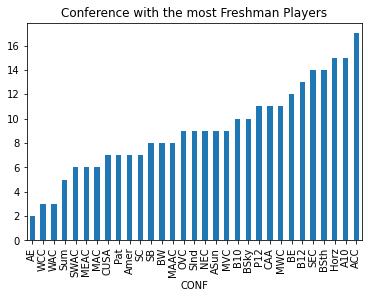

In [9]:
#which conference contains the youngest players
freshman = data[data["Role"]=="Fr"]
confage=freshman.groupby(["CONF"]).Role.count()
confage.sort_values(inplace=True)
confage.plot(kind="bar",title="Conference with the most Freshman Players")

<AxesSubplot:title={'center':'Best Teams in the Big 10 based on Player Rank'}, xlabel='TEAM'>

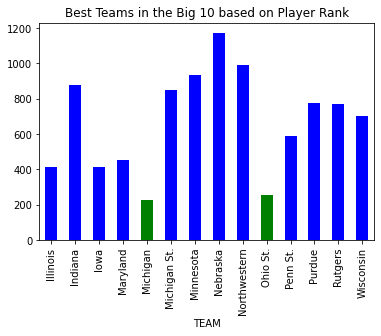

In [10]:
#which teams had the best ranked players in the big10
newset = data[data.CONF=='B10']
playerrank = newset.groupby("TEAM").RK.mean()
playerrank.plot(kind="bar",title="Best Teams in the Big 10 based on Player Rank",color=["blue","blue","blue","blue","green"])

In [5]:
#Conference and Rank
from ipywidgets import widgets, interactive, Layout
w_team = widgets.Dropdown(
    description = 'CONFERENCE',
    options = ["All"] + sorted(list(set(data.CONF))),  # a sorted list of unique teamIDs plus All
    value = "All",
    style = {"description_width": '50px'},
    layout = Layout(width="15%")
)

def view(team):
    if team == "All":
        df_tmp = data
    else:
        df_tmp = data[data.CONF == team]

    title = "Basketball Stats of {}".format(team)
    df_tmp[["RK"]].plot(kind="box", title=title, grid=True, figsize=(15,7))

i = interactive(view, team=w_team)
display(i)

interactive(children=(Dropdown(description='CONFERENCE', layout=Layout(width='15%'), options=('All', 'A10', 'A…